In [1]:
# importing all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the data
df = pd.read_csv('CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape 

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.isna().sum() # to check if there is any nulls

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
# Droping the columns that doesn't provide any value
df.drop(columns=['car_ID','symboling'],inplace =True)

# Some data Visualization to better understand the data

<Axes: xlabel='price', ylabel='Density'>

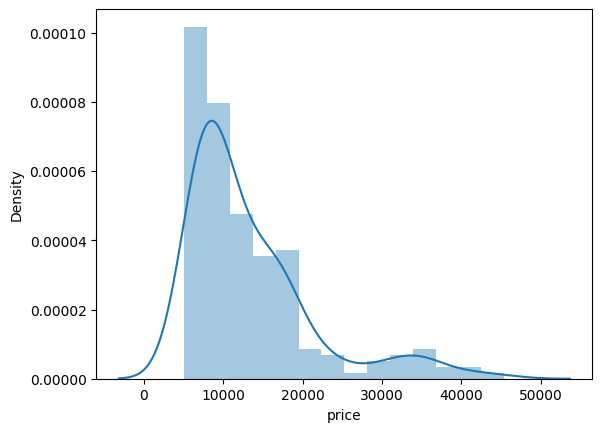

In [9]:
# distribution of the price column 
sns.distplot(df['price'])

<Axes: xlabel='fueltype', ylabel='price'>

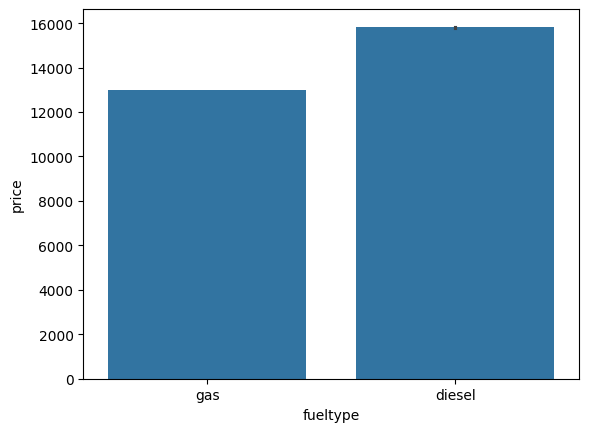

In [10]:
# barplot for the fueltypt relative to the price
sns.barplot(x=df.fueltype,y=df.price,ci=True)

Text(0, 0.5, 'Total Cylinder')

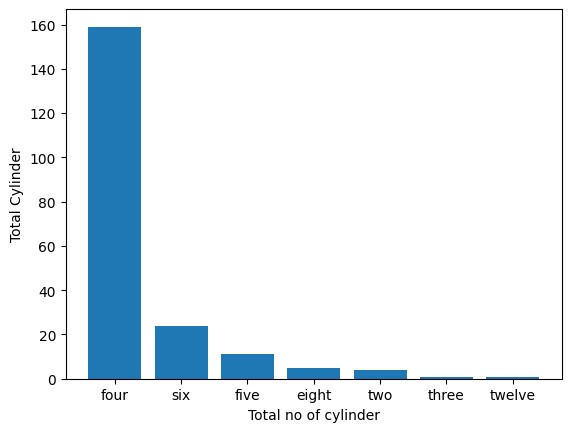

In [12]:
# countplot for the number of cylinders
plt.bar(df.cylindernumber.value_counts().index,df.cylindernumber.value_counts())
plt.xlabel("Total no of cylinder")
plt.ylabel("Total Cylinder")

<Axes: xlabel='carbody', ylabel='price'>

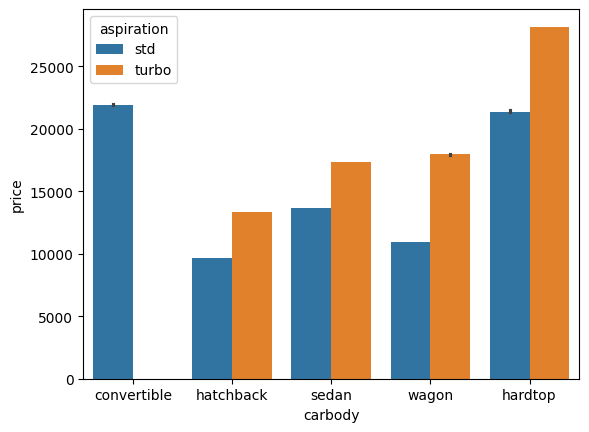

In [13]:
# barplot for the carbody relative to the price
sns.barplot(x=df.carbody,y=df.price,hue=df.aspiration,ci=True)

# Featrue selection

In [14]:
# List of significant variables
significant_variables = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber',
                           'drivewheel', 'curbweight', 'carlength', 'carwidth', 'enginesize',
                           'boreratio', 'horsepower', 'wheelbase', 'price']

# Create a new dataframe with only the significant variables
data = df[significant_variables].copy()

# Display the new dataframe
data.head()

,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price
0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,13495.0
1,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,16500.0
2,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5,16500.0
3,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8,13950.0
4,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4,17450.0


In [15]:
# fucntion to encode categorical cloumns based on the number of unqiue values
def encode_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category']).columns

    for col in categorical_features:
        df[col] = df[col].astype(str).str.strip().str.lower()
        unique_values = df[col].unique()
        num_unique_values = len(unique_values)

        if num_unique_values <= 2:
            encoding_type = 'oneHot'
        elif 5 <= num_unique_values <= 10:
            encoding_type = 'ordinal'
        else:
            encoding_type = 'label'

        if encoding_type == 'oneHot':
            encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            encoded_array = encoder.fit_transform(df[[col]])
            encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([col]))
            df = df.drop(columns=[col])
            df = pd.concat([df, encoded_df], axis=1)
        
        elif encoding_type == 'ordinal':
            encoder = OrdinalEncoder()
            encoded_array = encoder.fit_transform(df[[col]])
            encoded_df = pd.DataFrame(encoded_array, columns=[col])
            df = df.drop(columns=[col])
            df = pd.concat([df, encoded_df], axis=1)

        elif encoding_type == 'label':
            encoder = LabelEncoder()
            encoded_array = encoder.fit_transform(df[col])
            encoded_df = pd.DataFrame(encoded_array, columns=[col])
            df = df.drop(columns=[col])
            df = pd.concat([df, encoded_df], axis=1)

    return df

In [16]:
# encoding the data
data = encode_categorical_features(data)

In [17]:
data

,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price,enginetype,fueltype_diesel,fueltype_gas,carbody,aspiration_std,aspiration_turbo,cylindernumber,drivewheel
0,2548,168.8,64.1,130,3.47,111,88.6,13495.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2
1,2548,168.8,64.1,130,3.47,111,88.6,16500.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,2
2,2823,171.2,65.5,152,2.68,154,94.5,16500.0,5.0,0.0,1.0,2.0,1.0,0.0,3.0,2
3,2337,176.6,66.2,109,3.19,102,99.8,13950.0,3.0,0.0,1.0,3.0,1.0,0.0,2.0,1
4,2824,176.6,66.4,136,3.19,115,99.4,17450.0,3.0,0.0,1.0,3.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2952,188.8,68.9,141,3.78,114,109.1,16845.0,3.0,0.0,1.0,3.0,1.0,0.0,2.0,2
201,3049,188.8,68.8,141,3.78,160,109.1,19045.0,3.0,0.0,1.0,3.0,0.0,1.0,2.0,2
202,3012,188.8,68.9,173,3.58,134,109.1,21485.0,5.0,0.0,1.0,3.0,1.0,0.0,3.0,2
203,3217,188.8,68.9,145,3.01,106,109.1,22470.0,3.0,1.0,0.0,3.0,0.0,1.0,3.0,2


In [18]:
# defining our X and y
X=data.drop(columns = 'price')
y= data['price']

In [19]:
# Split the data into training and testing sets for the text
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model building and evaluation 

In [21]:
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
#making predictions
y_pred = model.predict(X_test_scaled)

In [23]:
# evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error (MSE): 14331251.645719202
R-squared (R2): 0.8184631149258819
Mean Absolute Error: 2642.4421071820616


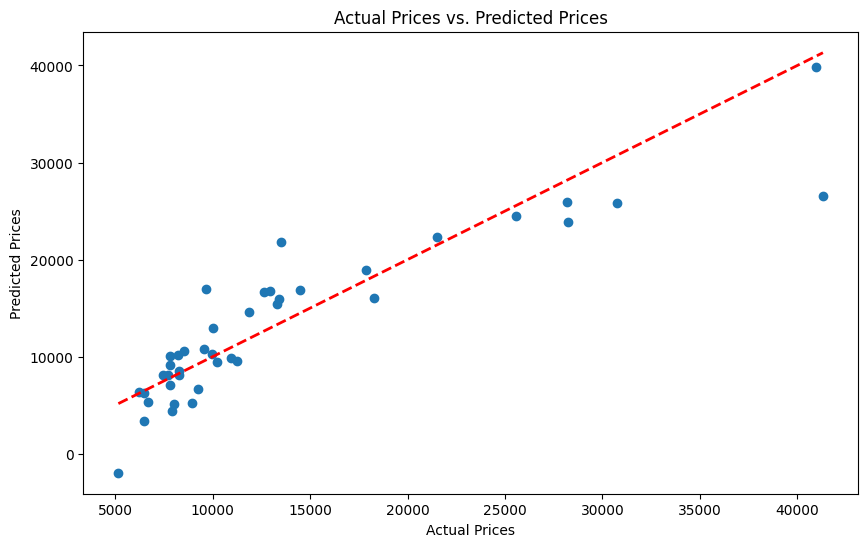

In [24]:
# Assuming 'y_test' is the actual prices and 'y_pred' is the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()